## Airbnb Project

***Introduction:***
Since 2006, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This project uses the "listing", "calandar", and "reviews" datasets about the service for LA. This public dataset is part of Airbnb that we provided for you, and the original source can be found on this website: [insidearibnb.com](http://insideairbnb.com/get-the-data.html).



***Task Description:*** 
One of the critical factors in deciding accommodation in Airbnb is price of reservation. Based on dataset, we should find out which factors will affect reservation prices and how we can save money on reservation.

### 1.Descriptive Analysis

#### -Number of unique listings and hosts in the LA dataset.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#importing the necessary dependencies
import pandas as pd
import numpy as np

# Note: If you have ram problem, you can use google colab (https://colab.research.google.com/notebooks/) instead of jupyter. 


df_listings = pd.read_csv('listings.csv', low_memory=False)

df_reviews = pd.read_csv('reviews.csv', low_memory=False)

df_calendar = pd.read_csv('calendar.csv', low_memory=False)

#df_listings.shape
#df_reviews.head()
#df_calendar.head()

In [3]:
#unique listings
total_listings=df_listings['id'].nunique()
total_listings
#unique hosts

total_hosts=df_listings['host_id'].nunique()
total_hosts

38481

22274

- There are 38481 unique listings and 22274 unique hosts in the LA dataset

####  -Mean, median, standard deviation, minimum and maximum of the number of listings per host in LA.

In [4]:
# Please write your code here:
df_la = df_listings[df_listings["city"] == "Los Angeles"]
df_la.host_id.value_counts().describe()

count    12626.000000
mean         1.655473
std          3.405334
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        208.000000
Name: host_id, dtype: float64

##### Description of the number of listings per host
- mean:1.655473
- median:1.000000
- std: 3.405334
- min: 1
- max: 208.000000

#### - Average and standard deviation number of listings for a super host versus a non-super host. Super host or non-super host listing comparison.

In [5]:
# Please write your code here:
df_super=df_listings[df_listings['host_is_superhost'] == 't']
df_non=df_listings[df_listings['host_is_superhost'] == 'f']
df_super.groupby('host_id').id.count().agg(['mean','std'])
df_non.groupby('host_id').id.count().agg(['mean','std'])

mean    1.828827
std     4.085577
Name: id, dtype: float64

mean    1.684001
std     3.218153
Name: id, dtype: float64

**Superhost:**
- mean:1.828827
- std:4.085577

**host:**
- mean:1.684001
- std:3.218153

***Super hosts have more listings on average.***

#### - Unique types of host verifications.

In [6]:
#Verification = [[].append(method) for method in list(df_listings['host_verifications'])]
Verification=df_listings['host_verifications'].tolist()

total=[]
for i in range(len(Verification)):
    lists= Verification[i].replace('"','').replace('[','').replace(']','').replace(' ','').split(',')
    for n in lists:
        total.append(n)
df=pd.DataFrame(total,columns=['type'])
df.type.unique()
df.type.nunique()

array(["'email'", "'phone'", "'facebook'", "'reviews'", "'kba'",
       "'jumio'", "'government_id'", "'offline_government_id'",
       "'selfie'", "'identity_manual'", "'work_email'", "'google'",
       "'manual_offline'", '', "'sent_id'", "'manual_online'",
       "'photographer'", "'sesame'", "'sesame_offline'", "'zhima_selfie'",
       "'weibo'", 'None'], dtype=object)

22

There are 20 different types of hosts verifications, including 'email','phone','facebook','reviews','kba','jumio','government_id','offline_government_id','selfie',
'identity_manual','work_email','google','manual_offline','sent_id','manual_online','photographer','sesame','sesame_offline','zhima_selfie','weibo'

#### Five most popular verification types of hosts. For each type of the top five verifications, mean/standard deviation of the average price.

In [7]:
# Please write your code here:
df.type.value_counts()
#phone
df1=df_listings[df_listings['host_verifications'].str.contains("'phone'")]
phone=df1.host_id.nunique()/total_hosts
phone
#email
df2=df_listings[df_listings['host_verifications'].str.contains("'email'")]
email=df2.host_id.nunique()/total_hosts
email
#reviews
df3=df_listings[df_listings['host_verifications'].str.contains("'reviews'")]
reviews=df3.host_id.nunique()/total_hosts
reviews
# government_id
df4=df_listings[df_listings['host_verifications'].str.contains("'government_id'")]
government_id=df4.host_id.nunique()/total_hosts
government_id
#offline_government_id
df5=df_listings[df_listings['host_verifications'].str.contains("'offline_government_id'")]
offline_government_id=df5.host_id.nunique()/total_hosts
offline_government_id

'phone'                    38404
'email'                    35777
'reviews'                  26299
'government_id'            25720
'offline_government_id'    19283
'jumio'                    16850
'selfie'                   12800
'identity_manual'          11564
'kba'                       8608
'facebook'                  6378
'work_email'                5574
'google'                    2613
'manual_offline'             527
'manual_online'              294
'sent_id'                    164
'zhima_selfie'               161
'weibo'                       77
'sesame'                      38
'sesame_offline'              38
                               9
None                           7
'photographer'                 6
Name: type, dtype: int64

0.9974409625572416

0.92376762144204

0.6457304480560294

0.6194666427224567

0.4410523480290922

The 5 most popular verificaation types are 'phone','email','reviews','government_id' and 'offline_government_id.
- phone:99.74%
- email: 92.37%
- reviews:64.57%
- government_id:61.95%
- offline_government_id:44.11%

#### - Mean, standard deviation of the average price from 01/20/2020 to 03/20/2020 (inclusive)

In [8]:
# Please write your code here
#df_calendar.head()
df_calendar["date"] = pd.to_datetime(df_calendar["date"]) 
#df_calendar.dtypes
df_price=df_calendar.loc[(df_calendar["date"]<='2020-03-20')&(df_calendar["date"]>='2020-01-20'),]
df_price['price']=df_price['price'].str.replace('$','')
df_price['price']=df_price['price'].str.replace(',','').astype('float64')
df_price.groupby('date').price.mean().describe()


<ipython-input-8-2bcc4820ea5d>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_price['price']=df_price['price'].str.replace('$','')
<ipython-input-8-2bcc4820ea5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['price']=df_price['price'].str.replace('$','')
<ipython-input-8-2bcc4820ea5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

count      7.000000
mean     211.301804
std        4.176603
min      208.279236
25%      208.619244
50%      208.948623
75%      213.374831
max      217.896622
Name: price, dtype: float64

The mean of the average price is $211.301804
the standard deviation of the average price is 4.176603

#### - The most popular ten words except stopping words

In [9]:
!pip install nltk


In [10]:
# Please write your code here:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')


[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# Please write your code here:

#df_reviews
df_reviews['date']=pd.to_datetime(df_reviews['date'])
df_reviews1=df_reviews.loc[(df_reviews['date']>='2019-01-01')&(df_reviews['date']<='2019-01-31'),]
#df_reviews1['comments'].tolist()
punc_number= ' ~/\n,.?''!:;-_[]{}()"@#$*><0123456789'
total_words=[]
for lists in df_reviews1['comments'].tolist():
    words=str(lists).lower().split(' ')
    words = [n.strip(punc_number) for n in words]
    for word in words:
        if word not in sw and word != '':
            total_words.append(word)
#total_words

wordcount={}    
for letter in total_words:
    if letter in wordcount.keys():
        wordcount[letter]=wordcount[letter]+1
    else:
        wordcount[letter]=1
#wordcount

# get the most popular ten words
words_dict_2 = {"Word":list(wordcount.keys()), "Count":list(wordcount.values())}
df_word = pd.DataFrame(data=words_dict_2)
df_word.sort_values(by="Count", ascending=False)[:10]


,Word,Count
3,place,16522
0,great,16483
4,stay,12563
1,location,9386
142,clean,8182
45,nice,6065
127,would,6033
18,host,5842
14,house,4825
38,everything,4700


most popular ten words：
- place:16522
- great：16483
- stay:12563
- location:9386
- clean:8182
- nice:6065
- would:6033
- host: 5842
- house:4825
- everything:4700

## 2. Preditive analysis

In [29]:
#turn categorical columns into dummies
cat_columns = list(df_listings.select_dtypes(include=['object']).columns)
    
for col in cat_columns:
    df = pd.concat([df_listings.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_',
                    drop_first=True, dummy_na=True)], axis=1)
#drop listing_id and year columns
#df = df_listings.drop(columns = ['listing_url'])

#prepare train and test datasets for modelling
TEST_SIZE = 0.3
RAND_STATE = 42

X = df.drop(columns = 'price')
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

KeyError: 'listing_url'

In [ ]:
#train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

In [ ]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

plt.savefig('feature importances RF.png')
 
plt.show()

Based on the feature engineering,time of year,location,bathrooms, number of bedrooms,beds and accomodates have influence on price. Among them, host characters are most critial as listings, his/her experience and reponding times are related with price.
Also, the pricing might depend on reviews: number of reviews and review scores.

## 3.Other findings

- The price distribution of all hosts in LA

- Locations of top 20 nerbourhoods

- Difference between the price of the hosts and superhosts

- Difference between the average ratings of hosts and superhosts

- Difference between Host Response Rate % of hosts VS super hosts

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("ggplot")

count    38481.000000
mean       228.915985
std        681.724766
min          0.000000
25%         70.000000
50%        110.000000
75%        189.000000
max      25000.000000
Name: price, dtype: float64

Text(728.915984511837, 10000, 'Average = $228.92')

[Text(0.5, 1.0, 'The distribution of airbnb host in LA')]

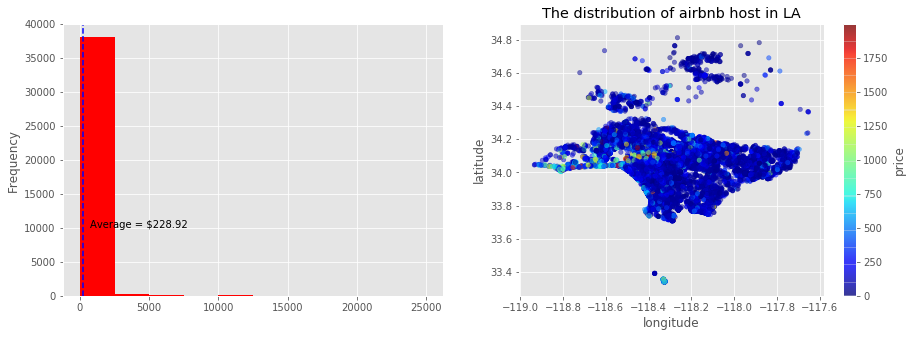

In [52]:
# The price distribution of all hosts in LA

df_listings["price"] = df_listings.price.apply(lambda x: str(x).replace("$","").replace(",","")).astype(float)
df_listings["price"].describe()
#plot 
fig , (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize = (15,5))
df_listings.price.plot(kind='hist',x = "price",color='red',ax=ax0)
Average1 = df_listings.price.mean()
ax0.axvline(Average1, color = "b", linestyle = "--")
text = "Average = $%0.2f" % Average1
ax0.annotate(text, xy = (Average1+500,10000))
# From the histagram, we could see that most of the price concentrate in $0-$2000.The Average price is only $228.92.
#Therefore, we eliminate the price that is larger than $2000

#Visualize price distributiony
df_price=df_listings[df_listings["price"]<2000]
df_price.plot(kind='scatter', x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.5, ax=ax1)
ax1.set(title="The distribution of airbnb host in LA")
#From the map, we could learn that most of the host with relative high price level are located in the western of the city, which is situated by the sea。

[Text(0.5, 1.0, 'The location of top 20 neighborhood')]

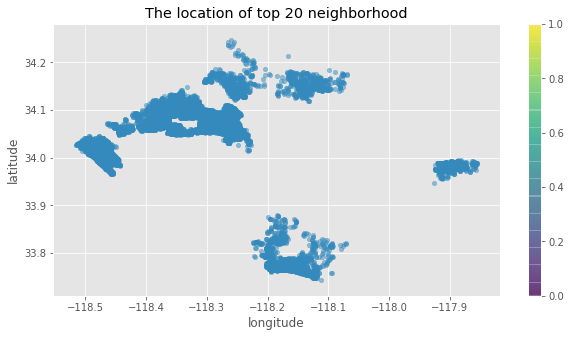

In [134]:
# Locations of top 20 nerbourhoods

df_neighbourhood = pd.DataFrame(df_listings.groupby(by="neighbourhood_cleansed").id.count())
top20_neighbour= list(df_neighbourhood.reset_index().sort_values(by="id", ascending=False).neighbourhood_cleansed[:20])
neighbour = df_listings[df_listings.neighbourhood_cleansed.apply(lambda x: x in top20_neighbour)]
fig,ax = plt.subplots(figsize=(10,5))
neighbour.plot(kind='scatter', x='longitude', y='latitude', cmap=plt.get_cmap('jet'), alpha=0.5, ax=ax)
ax.set(title="The location of top 20 neighborhood")


count    38481.000000
mean       228.915985
std        681.724766
min          0.000000
25%         70.000000
50%        110.000000
75%        189.000000
max      25000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Price on whether host is superhost')

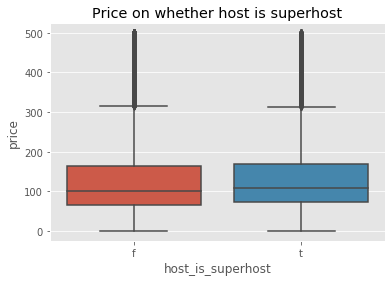

In [99]:
# Difference between the price of the hosts and superhosts
df_listings["price"] = df_listings.price.apply(lambda x: str(x).replace("$","").replace(",","")).astype(float)
df_listings['price'].describe()
fig = sns.boxplot(x="host_is_superhost",y="price",data=df_listings[df_listings['price']<500])
plt.title("Price on whether host is superhost")
plt.show(fig)

[Text(0, 0.5, 'Ratings'),
 Text(0.5, 0, 'Host is superhost'),
 Text(0.5, 1.0, 'Host VS Superhost:the average ratings ')]

(0, 13)

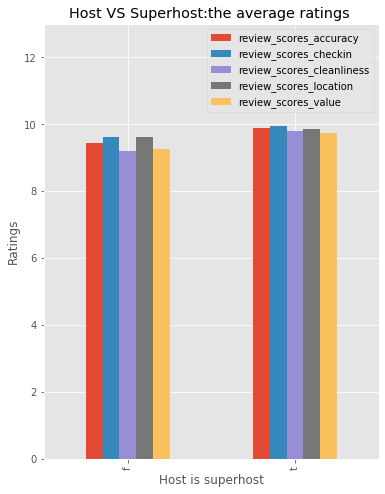

In [129]:
# Difference between the average ratings of hosts and superhosts

#drop all null value in column 'host_is_superhost'
df_hosts=df_listings[df_listings['host_is_superhost'].notnull()]

df_ratings=df_hosts.groupby('host_is_superhost')[['review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_location','review_scores_value']].mean()

fig,ax = plt.subplots(figsize = (6,8))
df_ratings.plot(kind='bar',ax=ax)
ax.set(title = "Host VS Superhost:the average ratings ", xlabel="Host is superhost", ylabel= "Ratings")
ax.set_ylim([0, 13])
ax.legend(loc=1)
#from the chart, we could ssee that superhosts' average ratings on accuracy,checkin,cleanliness,location and value are higher than those ratings of host.

[Text(0.5, 1.0, 'The proportion of host response time for non-superhosts')]

(0, 1)

[Text(0.5, 1.0, 'The proportion of host response time for superhosts')]

(0, 1)

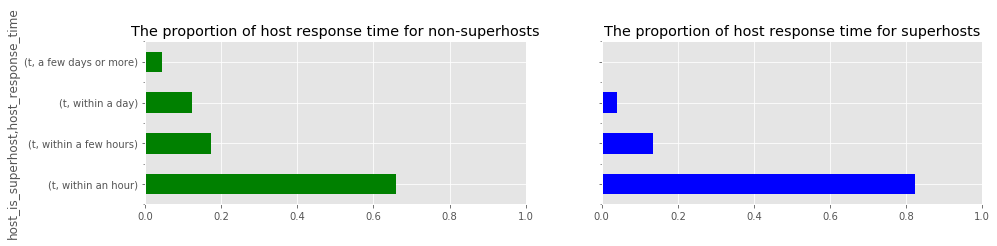

In [127]:
# Difference between Host Response Rate % of hosts VS super hosts

#drop all null value in column 'host_is_superhost'
df_hosts=df_listings[df_listings['host_is_superhost'].notnull()]

#seperate the data into superhost and host
df_host=df_hosts.loc[df_hosts['host_is_superhost']=='f',]
df_superhost=df_hosts.loc[df_hosts['host_is_superhost']=='t',]

# hosts
#df_host_response=df_host.groupby('host_is_superhost').host_response_time.value_counts()
df_host_response=df_host.groupby('host_is_superhost').host_response_time.value_counts()/df_host.host_response_time.count()
df_host_response=pd.DataFrame(df_host_response)
#df_host_response
#plot the data
fig , (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize = (15,3),sharey=True)
df_host_response.host_response_time.plot(kind= "barh",x='percentage',y='host response time',color="g",ax=ax0)
ax0.set(title="The proportion of host response time for non-superhosts")
ax0.set_xlim([0, 1])

# superhosts
df_superhost_response=df_superhost.groupby('host_is_superhost').host_response_time.value_counts()/df_superhost.host_response_time.count()
df_superhost_response=pd.DataFrame(df_superhost_response)
#df_superhost_response
#plot the data
df_superhost_response.host_response_time.plot(kind= "barh",x='percentage',y='host response time',color="b",ax=ax1)
ax1.set(title="The proportion of host response time for superhosts")
ax1.set_xlim([0, 1])

In [31]:
#WordCloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_listings_q7 = df_listings.dropna(axis=0,subset=['amenities']).copy()
df_listings_q7 = df_listings_q7.loc[:,['host_id','amenities']].drop_duplicates(keep='last')
#df_listings_q7

words = {}
for amenity in df_listings_q7.amenities.tolist():
    if type(amenity)==str:
        amenity = amenity.lower().split(',')
        amenity = [item.strip("{}\"") for item in amenity if item!='']
        #print(comment)
        for word in amenity:
            if word in words:
                words[word] += 1
            else:
                words[word] = 1

words_sort = {value:key for key, value in words.items()}
for value in sorted(words_sort.keys(),reverse=True):
    print('%s=%d' %(words_sort[value],value))

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
wc = WordCloud(background_color='white',width=2000,height=2000).generate_from_frequencies(words)

plt.imshow(wc)
plt.axis('off')
plt.show()

#### Recommendation

In this part, the dataset that we mainly focused on is 'listings.csv'.
First,  we want to have a general overview of the locations and price distribution of the hosts in this dataset. Then, we would compare some attributes between the hosts and super hosts, hoping to find the reasons why super hosts become 'super'.

Among the five questions we have set, we first did a general background exploration on the price distribution of all hosts to discover the price level of Airbnbs in different locations in  LA and find what factors lead to the high price for an Airbnb. Besides, we calculated the number of hosts in each neighborhood and filtered out the 20 neighborhoods with the highest number of hosts and plot their locations on the map. Finally, we tried to explore the differences between hosts and super hosts based on price, average ratings, and hosts response time, hoping to find the decisive factors for a super host and what improvements a host can make to become a super host in the future.  

From question 1, We found that the regular price for an Airbnb in LA is between $0-$100. 75% of the set price for an airbnb is lower than $189.The majority of the host with relatively high price levels are located in the west of the city, which is situated by the sea. It seems that whether the host is aside from the sea is a decisive factor for the price of an Airbnb. From question 2, we discovered that the locations of the top 20 neighborhoods are located in the northwest part of LA. From the map, we could see that the top 20 neighborhoods are mainly located in Santa Monica and also situated by the sea. It is reasonable to predict that Santa Monica is an excellent tourist destination, backed by the sea, with pleasant sceneries and high-quality service. 

From the charts in questions 3,4, and 5, we could see that the price of super hosts is slightly higher than the hosts.At the same time, the average ratings of super hosts for four aspects (accuracy, check-in, cleanliness, location, and value) are also higher than normal hosts. One of the reasons behind the high price and high ratings behind the super hosts is the response time.The bar chart in Q5 shows that the response time for super hosts tends to be shorter than hosts'. Around 83% of super hosts respond within one hour, while only 65% of hosts respond within one hour. For hosts who respond within a few hours or within a day, the percentage of super hosts is smaller than that of the normal hosts. Moreover, responding within a few days and more doesn't appear among super hosts. The results indicate that the ratings are determined by the attitude and service of a host. If hosts want to be super hosts, they need to improve their service, shorten the response time and provide a greater experience for guests.

### 4. Summary

Based on analysis above , we get knowledge of current status on LA Airbnb market, which gives us guidence on how to choose between places offered by Airbnb and save money to get best accomendation place.

Time to travel :)